In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import numpy.random as random

import os
#exit the folder to the main folder
print("File location using os.getcwd():", os.getcwd())
os.chdir('../../')
print("File location using os.getcwd():", os.getcwd())
import Plot_options

c = Plot_options.standard_plot_options()

np.random.seed(56)

File location using os.getcwd(): /home/AMAS/Exercises/Week 3
File location using os.getcwd(): /home/AMAS


In [2]:
import pandas as pd
data_ex1 = pd.read_csv('https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/ParameterEstimation_Ex1.txt', sep=' ', header=None)
import scipy as sp

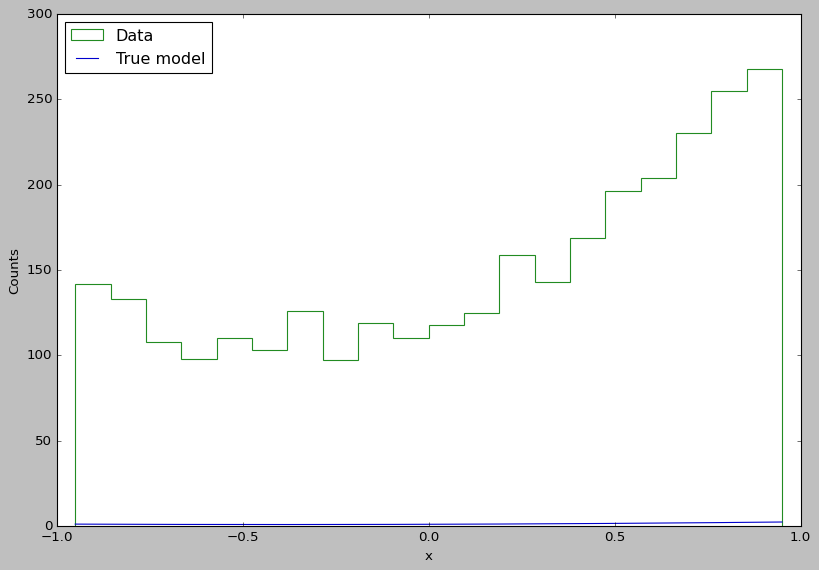

In [3]:
def function_1param(x,beta):
    return 1+0.65*x+beta*x**2

x_range = (-0.95,0.95)
xes = np.linspace(x_range[0],x_range[1],10000)
bins_ex1 = np.linspace(x_range[0],x_range[1],21)
normalization_factor = sp.integrate.quad(lambda x: function_1param(x,0.8),x_range[0],x_range[1])[0]

init_fig, init_ax = plt.subplots(1,1,figsize = (12,8))
counts_data, bins_data, plot_data = init_ax.hist(data_ex1[0], bins=bins_ex1, histtype='step', label='Data')

bin_centers = 0.5*(bins_data[1:]+bins_data[:-1])

init_ax.plot(xes, function_1param(xes,0.8), label='True model')
init_ax.set_xlabel('x')
init_ax.set_ylabel('Counts')
init_ax.legend(loc= 'upper left')



In [4]:
import iminuit as im
from iminuit import Minuit
from scipy.integrate import quad

In [5]:
# Normalize the function over the range -0.95 to 0.95
def normalize_func( beta):
    integral, _ = quad(function_1param, -0.95, 0.95, args=(beta))
    return integral

# Negative Log-Likelihood (NLL) Function
def neg_log_likelihood(beta):
    norm_factor = normalize_func(beta)
    pdf_vals = function_1param(np.array(data_ex1),beta) / norm_factor
    
    log_likelihood = np.sum(np.log(pdf_vals))
    
    return -2*log_likelihood  # Return negative log-likelihood for minimization

minuit = Minuit(neg_log_likelihood, beta=0.8) 
minuit.errordef = Minuit.LIKELIHOOD
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3558                       │              Nfcn = 19               │
│ EDM = 2.07e-08 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ beta │   0.88    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────┐
│      │    beta │
├──────┼─────────┤
│ beta │ 0.00453 │
└──────┴─────────┘

In [6]:
beta_space = np.linspace(0.5, 1.5, 1000)
nll_vals = np.array([neg_log_likelihood(beta) for beta in beta_space])

# find the places where the nll is 0.5 larger than the minimum on both sides of the minimum
min_nll = minuit.values['beta']

sigma_plus_ind = np.where(nll_vals < minuit.fval + 0.5)[0][-1]
sigma_minus_ind = np.where(nll_vals < minuit.fval + 0.5)[0][0]

sigma_plus = beta_space[sigma_plus_ind]
sigma_minus = beta_space[sigma_minus_ind]

print(r'$\beta = {:.2f} {{+{:.2f}}}_{{-{:.2f}}}$'.format(min_nll, sigma_plus-min_nll, min_nll-sigma_minus))

$\beta = 0.88 {+0.07}_{-0.07}$


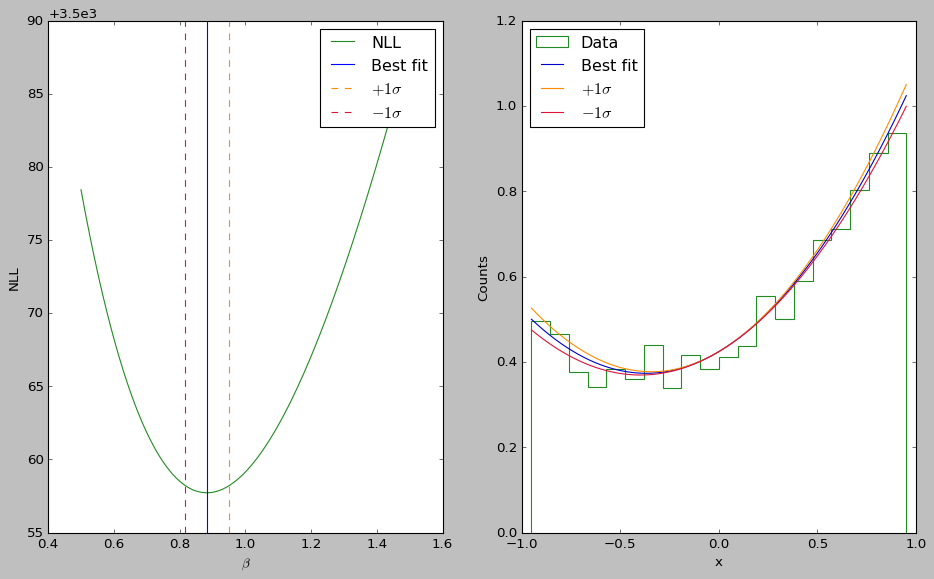

In [7]:

fig_1param_fit, ax_1param_fit = plt.subplots(1,2,figsize = (14,8))
ax_1param_fit[0].plot(beta_space, nll_vals, label='NLL')
ax_1param_fit[0].axvline(min_nll, label='Best fit')
ax_1param_fit[0].axvline(sigma_plus, linestyle='--', label=r'$+1\sigma$',color=c[2])
ax_1param_fit[0].axvline(sigma_minus, linestyle='--', label=r'$-1\sigma$',color=c[3])
ax_1param_fit[0].set_xlabel(r'$\beta$')
ax_1param_fit[0].set_ylabel('NLL')
ax_1param_fit[0].legend()

counts_data, bins_data, plot_data = ax_1param_fit[1].hist(data_ex1[0], bins=bins_ex1, histtype='step', label='Data',density=True)
bin_centers = 0.5*(bins_data[1:]+bins_data[:-1])
ax_1param_fit[1].plot(xes, function_1param(xes,min_nll)/normalization_factor, label='Best fit')
ax_1param_fit[1].plot(xes, function_1param(xes,sigma_plus)/normalization_factor, label=r'$+1\sigma$')
ax_1param_fit[1].plot(xes, function_1param(xes,sigma_minus)/normalization_factor, label=r'$-1\sigma$')
ax_1param_fit[1].set_xlabel('x')
ax_1param_fit[1].set_ylabel('Counts')
ax_1param_fit[1].legend(loc= 'upper left')



## Exercise 2 a and d

Number of function evaluations: 45


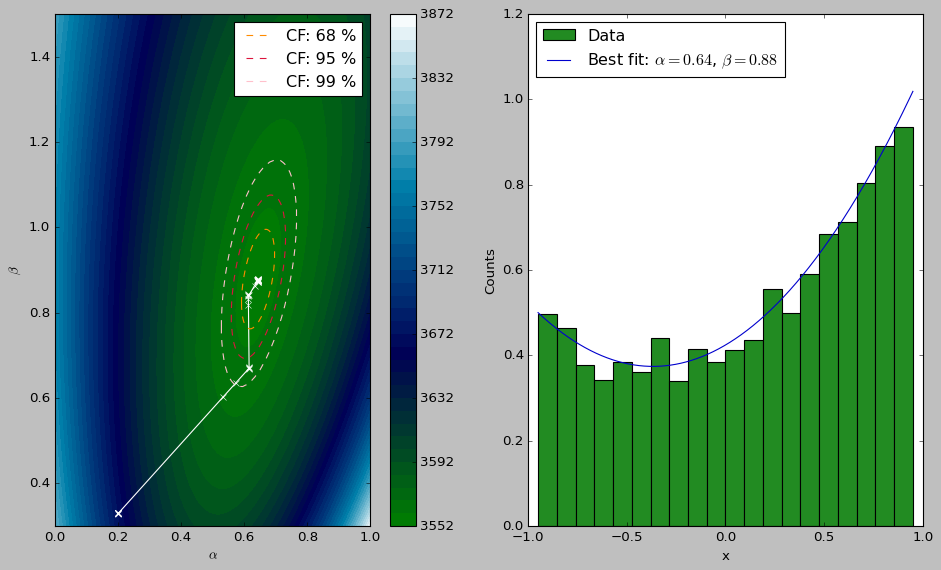

In [22]:
function_2param = lambda x, alpha, beta: 1+alpha*x+beta*x**2

def normalized_func_2param(alpha, beta, data = np.array(data_ex1)):
    integral, _ = quad(function_2param, -0.95, 0.95, args=(alpha, beta))
    return function_2param(data, alpha, beta) / integral

step_history = []
def neg_log_likelihood_2param(alpha, beta):
    pdf_vals = normalized_func_2param(alpha, beta)
    log_likelihood = np.sum(np.log(pdf_vals))
    step_history.append((alpha, beta))
    return -2*log_likelihood  # Return negative log-likelihood for minimization

minuit_2param = Minuit(neg_log_likelihood_2param, alpha=0.2, beta=0.33)
minuit_2param.errordef = Minuit.LIKELIHOOD
minuit_2param.migrad()
alpha_steps, beta_steps = zip(*step_history)

alpha_space = np.linspace(0., 1, 100)
beta_space = np.linspace(0.3, 1.5, 100)

#compute the ln likelihood for the 2D space
nll_vals_2param = np.array([[neg_log_likelihood_2param(alpha, beta) for alpha in alpha_space] for beta in beta_space])

fig_2param_fit, ax_2param_fit = plt.subplots(1,2,figsize = (14,8))
contor = ax_2param_fit[0].contourf(alpha_space, beta_space, nll_vals_2param, levels=50, cmap='ocean')
fig_2param_fit.colorbar(contor, ax=ax_2param_fit[0])
ax_2param_fit[0].plot(alpha_steps, beta_steps, 'x-', color='white', alpha=1)
ax_2param_fit[0].set_xlabel(r'$\alpha$')
ax_2param_fit[0].set_ylabel(r'$\beta$')

counts_data, bins_data, plot_data = ax_2param_fit[1].hist(data_ex1[0], bins=bins_ex1, label='Data',density=True)
bin_centers = 0.5*(bins_data[1:]+bins_data[:-1])
ax_2param_fit[1].plot(xes, function_2param(xes,minuit_2param.values['alpha'],minuit_2param.values['beta'])/normalization_factor, label='Best fit: $\\alpha = {:.2f}$, $\\beta = {:.2f}$'.format(minuit_2param.values['alpha'],minuit_2param.values['beta'])) 
ax_2param_fit[1].set_xlabel('x')
ax_2param_fit[1].set_ylabel('Counts')
ax_2param_fit[1].legend(loc= 'upper left')

print('Number of function evaluations:', minuit_2param.nfcn)

contour_1sigma_2param = minuit_2param.mncontour('alpha','beta', size=100,cl = 1).T
contour_2sigma_2param = minuit_2param.mncontour('alpha','beta', size=100,cl = 2).T
contour_3sigma_2param = minuit_2param.mncontour('alpha','beta', size=100,cl = 3).T

ax_2param_fit[0].plot(contour_1sigma_2param[0], contour_1sigma_2param[1], color=c[2], linestyle='--',label='CF: 68 %')
ax_2param_fit[0].plot(contour_2sigma_2param[0], contour_2sigma_2param[1],  color=c[3], linestyle='--',label='CF: 95 %')
ax_2param_fit[0].plot(contour_3sigma_2param[0], contour_3sigma_2param[1],  color=c[5], linestyle='--',label='CF: 99 %')
ax_2param_fit[0].legend()



## Exercise 2 b

In [ ]:

import functools

N_pseudo_trials = 500
N_data_points = len(data_ex1)
x_range = (-0.95, 0.95)

function_2param = lambda x, alpha, beta: 1 + alpha * x + beta * x**2

def normalized_func_2param_boot(data, alpha, beta):
    integral, _ = quad(function_2param, x_range[0], x_range[1], args=(alpha, beta))
    return function_2param(data, alpha, beta) / integral

def llh_booststrap(alpha, beta, data):
    pdf_vals = normalized_func_2param_boot(data, alpha, beta)
    log_likelihood = np.sum(np.log(pdf_vals))
    return -2 * log_likelihood

def parametric_bootstrap(data, N_pseudo_trials, N_data_points, x_range):
    pseudo_data_alpha, pseudo_data_beta = np.zeros(N_pseudo_trials), np.zeros(N_pseudo_trials)

    for i in range(N_pseudo_trials):
        # Generate data from the model
        x_bootstrap = np.random.uniform(x_range[0], x_range[1], N_data_points)
        y_bootstrap = np.random.uniform(0, 1, N_data_points)

        # Using accept-reject method
        bootstrapped_data = x_bootstrap[y_bootstrap < normalized_func_2param_boot(
            x_bootstrap, minuit_2param.values['alpha'], minuit_2param.values['beta']
        )]

        # Define a lambda function that fixes the data and only optimizes alpha, beta
        llh_fixed_data = lambda alpha, beta: llh_booststrap(alpha, beta, bootstrapped_data)

        # Minuit only takes two parameters now
        minuit_pseudo = Minuit(llh_fixed_data, alpha=0.2, beta=0.33)
        minuit_pseudo.errordef = Minuit.LIKELIHOOD
        minuit_pseudo.migrad()

        pseudo_data_alpha[i] = minuit_pseudo.values['alpha']
        pseudo_data_beta[i] = minuit_pseudo.values['beta']

    return pseudo_data_alpha, pseudo_data_beta



In [10]:
pseudo_alpha, pseudo_beta = parametric_bootstrap(data_ex1, N_pseudo_trials, N_data_points, x_range)

In [11]:
# Compute 68.27% confidence intervals (16th and 84th percentiles)
alpha_lower, alpha_upper = np.percentile(pseudo_alpha, [16, 84])
beta_lower, beta_upper = np.percentile(pseudo_beta, [16, 84])

# Print results
print(f"68.27% Confidence Interval for alpha: [{alpha_lower:.4f}, {alpha_upper:.4f}]")
print(f"68.27% Confidence Interval for beta: [{beta_lower:.4f}, {beta_upper:.4f}]")


68.27% Confidence Interval for alpha: [0.5726, 0.7019]
68.27% Confidence Interval for beta: [0.7151, 1.0121]


Text(0, 0.5, '$\\beta$')

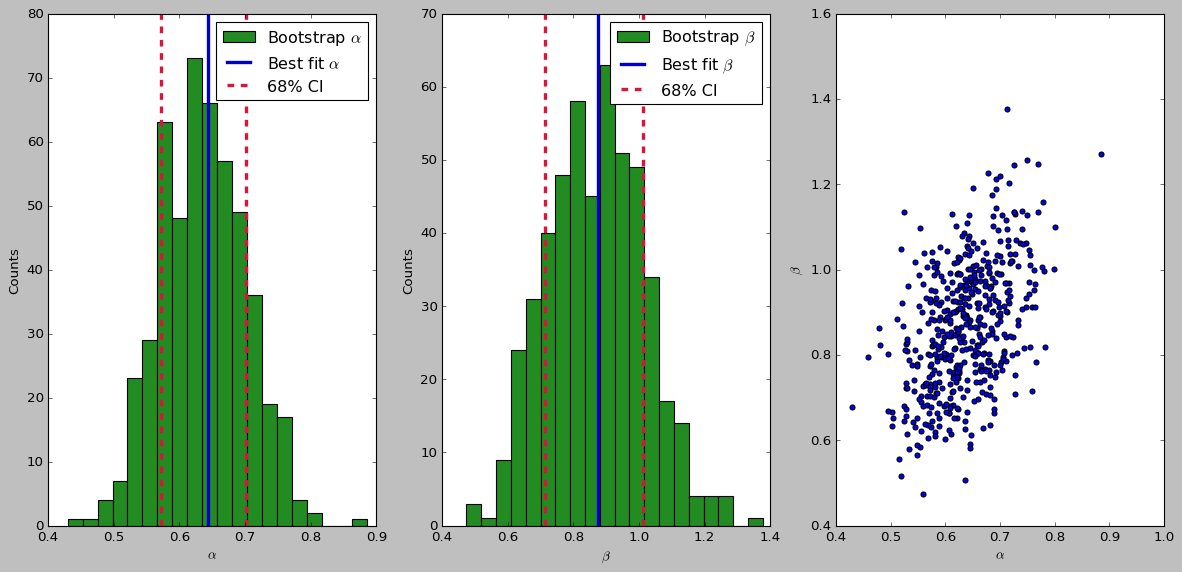

In [12]:
fig_bootstrap, ax_bootstrap = plt.subplots(1,3,figsize = (18,8))
ax_bootstrap[0].hist(pseudo_alpha, bins=20, label='Bootstrap $\\alpha$')
ax_bootstrap[0].axvline(minuit_2param.values['alpha'], label='Best fit $\\alpha$',color=c[1],lw = 3)
# plot the 68% confidence interval
ax_bootstrap[0].axvline(alpha_lower, linestyle='--', label='68% CI',color=c[3],lw = 3)
ax_bootstrap[0].axvline(alpha_upper, linestyle='--',color=c[3],lw = 3)

ax_bootstrap[0].set_xlabel(r'$\alpha$')
ax_bootstrap[0].set_ylabel('Counts')
ax_bootstrap[0].legend()

ax_bootstrap[1].hist(pseudo_beta, bins=20, label='Bootstrap $\\beta$')
ax_bootstrap[1].axvline(minuit_2param.values['beta'], label='Best fit $\\beta$',color=c[1],lw = 3)
# plot the 68% confidence interval
ax_bootstrap[1].axvline(beta_lower, linestyle='--', label='68% CI',color=c[3],lw = 3)
ax_bootstrap[1].axvline(beta_upper, linestyle='--',color=c[3],lw = 3)
ax_bootstrap[1].set_xlabel(r'$\beta$')
ax_bootstrap[1].set_ylabel('Counts')
ax_bootstrap[1].legend()

ax_bootstrap[2].scatter(pseudo_alpha, pseudo_beta, label='Bootstrap $\\alpha$ vs $\\beta$')
ax_bootstrap[2].set_xlabel(r'$\alpha$')
ax_bootstrap[2].set_ylabel(r'$\beta$')





In [14]:
data_ex3 = pd.read_csv('https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/MLE_Variance_data.txt', sep=' ', header=None)

In [ ]:
x1 = np.array(data_ex3[0])
x2 = np.array(data_ex3[1])

x_range = (-1,1)
bins_ex3 = np.linspace(x_range[0],x_range[1],21)

function_2param = lambda x, alpha, beta: 1+alpha*x+beta*x**2

def normalized_func_2param(alpha, beta, data = np.array(data_ex1)):
    integral, _ = quad(function_2param, -0.95, 0.95, args=(alpha, beta))
    return function_2param(data, alpha, beta) / integral

step_history = []
def neg_log_likelihood_2param(alpha, beta, *args):
    data = args[0] if args else np.array(data_ex1)  # Ensure data is correctly passed
    pdf_vals = normalized_func_2param(alpha, beta, data=data)
    log_likelihood = np.sum(np.log(pdf_vals))
    step_history.append((alpha, beta))
    return -2 * log_likelihood  # Negative log-likelihood for minimization

alpha_space_x1 = np.linspace(-0.8, 0.8, 100)
beta_space_x1 = np.linspace(0.2, 2, 100)

alpha_space_x2 = np.linspace(0.8, 2.5, 100)
beta_space_x2 = np.linspace(0.6, 2.5, 100)

neg_log_likelihood_x1 = lambda alpha, beta: neg_log_likelihood_2param(alpha, beta, x1)
minuit_x1 = Minuit(neg_log_likelihood_x1, alpha=0.3, beta=0.6)

minuit_x1.errordef = Minuit.LIKELIHOOD
minuit_x1.migrad()
alpha_steps_x1, beta_steps_x1 = zip(*step_history)

step_history = []
neg_log_likelihood_x2 = lambda alpha, beta: neg_log_likelihood_2param(alpha, beta, x2)
minuit_x2 = Minuit(neg_log_likelihood_x2, alpha=1.6, beta=0.9)
minuit_x2.errordef = Minuit.LIKELIHOOD
minuit_x2.migrad()
alpha_steps_x2, beta_steps_x2 = zip(*step_history)

lnl_x1 = np.array([[neg_log_likelihood_2param(alpha, beta, x1) for alpha in alpha_space_x1] for beta in beta_space_x1])
lnl_x2 = np.array([[neg_log_likelihood_2param(alpha, beta, x2) for alpha in alpha_space_x2] for beta in beta_space_x2])

fig_ex3, ax_ex3 = plt.subplots(2,2,figsize = (14,14))
contor_x1 = ax_ex3[0,0].contourf(alpha_space_x1, beta_space_x1, lnl_x1, levels=50, cmap='inferno')
fig_ex3.colorbar(contor_x1, ax=ax_ex3[0,0])
ax_ex3[0,0].plot(alpha_steps_x1, beta_steps_x1, 'x-', color='white', alpha=1)
ax_ex3[0,0].set_xlabel(r'$\alpha$')
ax_ex3[0,0].set_ylabel(r'$\beta$')
ax_ex3[0,0].set_title('Data set 1')

contor_x2 = ax_ex3[0,1].contourf(alpha_space_x2, beta_space_x2, lnl_x2, levels=50, cmap='inferno')
fig_ex3.colorbar(contor_x2, ax=ax_ex3[0,1])
ax_ex3[0,1].plot(alpha_steps_x2, beta_steps_x2, 'x-', color=c[8], alpha=1)
ax_ex3[0,1].set_xlabel(r'$\alpha$')
ax_ex3[0,1].set_ylabel(r'$\beta$')
ax_ex3[0,1].set_title('Data set 2')

counts_data_x1, bins_data_x1, plot_data_x1 = ax_ex3[1,0].hist(x1, bins=bins_ex3, label='Data set 1',density=True)
bin_centers_x1 = 0.5*(bins_data_x1[1:]+bins_data_x1[:-1])
ax_ex3[1,0].plot(bin_centers_x1, function_2param(bin_centers_x1,minuit_x1.values['alpha'],minuit_x1.values['beta'])/normalization_factor, label='Best fit: $\\alpha = {:.2f}$, $\\beta = {:.2f}$'.format(minuit_x1.values['alpha'],minuit_x1.values['beta']))
ax_ex3[1,0].set_xlabel('x')
ax_ex3[1,0].set_ylabel('Counts')
ax_ex3[1,0].legend(loc= 'upper left')

counts_data_x2, bins_data_x2, plot_data_x2 = ax_ex3[1,1].hist(x2, bins=bins_ex3, label='Data set 2',density=True)
bin_centers_x2 = 0.5*(bins_data_x2[1:]+bins_data_x2[:-1])
ax_ex3[1,1].plot(bin_centers_x2, function_2param(bin_centers_x2,minuit_x2.values['alpha'],minuit_x2.values['beta'])/normalization_factor, label='Best fit: $\\alpha = {:.2f}$, $\\beta = {:.2f}$'.format(minuit_x2.values['alpha'],minuit_x2.values['beta']))
ax_ex3[1,1].set_xlabel('x')
ax_ex3[1,1].set_ylabel('Counts')
ax_ex3[1,1].legend(loc= 'upper left')

print('Number of function evaluations for data set 1:', minuit_x1.nfcn)
print('Number of function evaluations for data set 2:', minuit_x2.nfcn)

contour_50_x1 = minuit_x1.mncontour('alpha','beta', size=100,cl = 0.5).T
contour_90_x1 = minuit_x1.mncontour('alpha','beta', size=100,cl = 0.9).T
contour_95_x1 = minuit_x1.mncontour('alpha','beta', size=100,cl = 0.95).T

contour_50_x2 = minuit_x2.mncontour('alpha','beta', size=100,cl = 0.5).T
contour_90_x2 = minuit_x2.mncontour('alpha','beta', size=100,cl = 0.9).T
contour_95_x2 = minuit_x2.mncontour('alpha','beta', size=100,cl = 0.95).T

ax_ex3[0,0].plot(contour_50_x1[0], contour_50_x1[1], color=c[2], linestyle='--',label='CF: 50 %')
ax_ex3[0,0].plot(contour_90_x1[0], contour_90_x1[1],  color=c[3], linestyle='--',label='CF: 90 %')
ax_ex3[0,0].plot(contour_95_x1[0], contour_95_x1[1],  color=c[5], linestyle='--',label='CF: 95 %')
ax_ex3[0,0].legend()

ax_ex3[0,1].plot(contour_50_x2[0], contour_50_x2[1], color=c[2], linestyle='--',label='CF: 50 %')
ax_ex3[0,1].plot(contour_90_x2[0], contour_90_x2[1],  color=c[3], linestyle='--',label='CF: 90 %')
ax_ex3[0,1].plot(contour_95_x2[0], contour_95_x2[1],  color=c[5], linestyle='--',label='CF: 95 %')
ax_ex3[0,1].legend()


NameError: name 'data' is not defined